<center><h1>Proyecto Unidad 2 Inteligencia Artificial</header1></center>

Presentado por: Génesis Heredia - Kevin Paute  <br>
Fecha: 28/07/2022

## Importación de librerias

In [122]:
# Importar libreria pandas como pd
import pandas as pd

# Importar libreria numpy como np
import numpy as np

#Importar libreria seaborn para graficos estadísticos y visualización de datos
import seaborn as sns

# Para graficar en python se importa la libreria matplotlib y se le asigna el alias plt
import matplotlib.pyplot as plt 

# Se importa la libreria StandardScaler para estandarizar la data
from sklearn.preprocessing import StandardScaler 

# Importar libreria DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Importar libreria train_test_split
from sklearn.model_selection import train_test_split

# Importar libreria metrics
from sklearn import metrics 

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier # Se importa el modelo RandomForestClassifier
from sklearn.model_selection import GridSearchCV # Se importa el modelo GridSearchCV
from sklearn.model_selection import RandomizedSearchCV # Se importa el modelo RandomizedSearchCV
from sklearn.metrics import precision_score # Se importa el modelo precision_score
from sklearn.metrics import recall_score # Se importa el modelo recall_score

from sklearn.metrics import confusion_matrix # Se importa el modelo confusion_matrix


## Cargar el Dataset

In [2]:
# Leer el archivo diabetes.csv
data_c = pd.read_csv("company.csv") 
# Mostrar los 5 primeros registros
data_c.head()                       

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## Descripción de la fuente del Dataset

Los datos se recopilaron del Taiwan Economic Journal para los años 1999 a 2009. La quiebra de la empresa se definió con base en las regulaciones comerciales de la Bolsa de Valores de Taiwán.

## Variables de entrada y variable objetivo. 

**Variable objetivo, también denominada "y" o variable dependiente (predicción)**

● Bankrupt:

 está en quiebra = 0 / no quebró = 1

**Variables de entrada, también denominada "x" o variable independiente**

● ROA(C) before interest and depreciation before interest: Rentabilidad sobre activos totales (C)

● ROA(A) before interest and % after tax: Rentabilidad sobre activos totales (A)

● ROA(B) before interest and depreciation after tax: Rentabilidad sobre activos totales (B)

● Operating Gross Margin: Utilidad bruta/Ventas netas

● Realized Sales Gross Margin: Utilidad bruta realizada/Ventas netas

● Operating Profit Rate: Utilidad operativa/ Ventas netas

● Pre-tax net Interest Rate: Ingresos antes de impuestos/Ventas netas

● After-tax net Interest Rate: Ingresos netos/Ventas netas

● Non-industry income and expenditure/revenue: Índice de ingresos no operativos netos

● Continuous interest rate (after tax): Utilidad neta - Excluye ganancia o pérdida por disposición/Ventas netasOperating Expense 

● Rate: Gastos operativos/Ventas netas


● Research and development expense rate: Gastos de investigación y desarrollo/Ventas netas.

● Cash flow rate: Flujo de caja de los pasivos operativos/corrientes: Deuda que devenga intereses/Patrimonio.

● Interest-bearing debt interest rate: Deuda que devenga intereses/Patrimonio.

● Tax rate (A): Tasa impositiva efectiva.

● Net Value Per Share (B): Valor en libros Por acción (B).

● Net Value Per Share (A): Valor contable por acción (A).

● Net Value Per Share (C): Valor contable por acción ©.

● Persistent EPS in the Last Four Seasons: UPA -Utilidad neta.

● Cash Flow Per Share

● Revenue Per Share (Yuan ¥): Ventas por acción.

● Operating Profit Per Share (Yuan ¥): Ingreso operativo por acción

● Per Share Net profit before tax (Yuan ¥): Ingreso antes de impuestos por acción.

● Realized Sales Gross Profit Growth Rate

● Operating Profit Growth Rate: Crecimiento de la utilidad operativa

● After-tax Net Profit Growth Rate: Crecimiento de la utilidad neta

● Regular Net Profit Growth Rate: Utilidad operativa continua después del crecimiento de impuestos.

● Continuous Net Profit Growth Rate: Ingreso neto -Excluyendo el crecimiento de pérdidas o ganancias por disposición.

● Total Asset Growth Rate: Crecimiento de activos totales

● Net Value Growth Rate: Crecimiento de capital total

● Total Asset Return Growth Rate Ratio: Rendimiento sobre el crecimiento de activos totales

● Cash Reinvestment %: Ratio de reinversión de efectivo

● Current Ratio

● Quick Ratio: Prueba ácida

● Interest Expense Ratio: Gastos por intereses/Ingresos totales

● Total debt/Total net worth: Ratio de pasivo total/patrimonio

● Debt ratio %: Pasivo/Activo total

● Net worth/Assets: Patrimonio/Activo total

● Long-term fund suitability ratio (A): (Pasivo a largo plazo+Patrimonio)/Activos fijos

● Borrowing dependency: Costo de la deuda que devenga intereses

● Contingent liabilities/Net worth: Pasivo contingente/Patrimonio

● Operating profit/Paid-in capital: Utilidad operativa/Capital

● Net profit before tax/Paid-in capital: Ingreso antes de impuestos/Capital

● Inventory and accounts receivable/Net value: (Inventario+Cuentas porcobrar)/Patrimonio

● Total Asset Turnover

● Accounts Receivable Turnover

● Average Collection Days: Días de cuentas por cobrar pendientes

● Inventory Turnover Rate (times)

● Fixed Assets Turnover Frequency

● Net Worth Turnover Rate (times): Rotación de acciones

● Revenue per person: Ventas por empleado

● Operating profit per person: Ingresos operativos por empleado

● Allocation rate per person: Activos fijos por empleado

● Working Capital to Total Assets

● Quick Assets/Total Assets

● Current Assets/Total Assets

● Cash/Total Assets

● Quick Assets/Current Liability

● Cash/Current Liability

● Current Liability to Assets

● Operating Funds to Liability

● Inventory/Working Capital

● Inventory/Current Liability

● Current Liabilities/Liability

● Working Capital/Equity

● Current Liabilities/Equity

● Long-term Liability to Current Assets

● Retained Earnings to Total Assets

● Total income/Total expense

● Total expense/Assets

● Current Asset Turnover Rate: activos circulantes sobre ventas

● Quick Asset Turnover Rate: Activos rápidos a ventas

● Working capitcal Turnover Rate: Capital de trabajo a ventas

● Cash Turnover Rate: efectivo a ventas

● Cash Flow to Sales

● Fixed Assets to Assets

● Current Liability to Liability

● Current Liability to Equity

● Equity to Long-term Liability

● Cash Flow to Total Assets

● Cash Flow to Liability

● CFO to Assets

● Cash Flow to Equity

● Current Liability to Current Assets

● Liability-Assets Flag:

● Net Income to Total Assets

● Total assets to GNP price

● No-credit Interval

● Gross Profit to Sales

● Net Income to Stockholder's Equity

● Liability to Equity

● Degree of Financial Leverage (DFL)

● Interest Coverage Ratio (Interest expense to EBIT)

● Net Income Flag: 1 si la utilidad neta es negativa durante los dos últimos años, 0 de lo contrario

● Equity to Liability

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [4]:
#Código que responde a la descripción anterior
df_c = pd.DataFrame(data_c)
np.round(df_c.describe(), 3)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,...,6819.000,6.819000e+03,6819.000,6819.000,6819.000,6819.000,6819.000,6819.000,6819.0,6819.000
mean,0.032,0.505,0.559,0.554,0.608,0.608,0.999,0.797,0.809,0.304,...,0.808,1.862942e+07,0.624,0.608,0.840,0.280,0.028,0.565,1.0,0.048
std,0.177,0.061,0.066,0.062,0.017,0.017,0.013,0.013,0.014,0.011,...,0.040,3.764501e+08,0.012,0.017,0.015,0.014,0.016,0.013,0.0,0.050
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000000e+00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.000
25%,0.000,0.477,0.536,0.527,0.600,0.600,0.999,0.797,0.809,0.303,...,0.797,1.000000e-03,0.624,0.600,0.840,0.277,0.027,0.565,1.0,0.024
50%,0.000,0.503,0.560,0.552,0.606,0.606,0.999,0.797,0.809,0.304,...,0.811,2.000000e-03,0.624,0.606,0.841,0.279,0.027,0.565,1.0,0.034
75%,0.000,0.536,0.589,0.584,0.614,0.614,0.999,0.798,0.809,0.304,...,0.826,5.000000e-03,0.624,0.614,0.842,0.281,0.027,0.566,1.0,0.053
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,9.820000e+09,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.000


In [5]:
df_c.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


In [51]:
#Reemplazar el nombre de la etiqueta
df_c.rename(columns={"Bankrupt?": "Bankrupt"}, inplace = True)

#Estadísticas de la variable objetivo
bankrupt = df_c['Bankrupt']
np.round(bankrupt.describe(), 3)

count    6819.000
mean        0.032
std         0.177
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: Bankrupt, dtype: float64

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [52]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)
cols_caract = df_c.drop('Bankrupt', axis=1)
var_objetivo = ['Bankrupt']
X = cols_caract # caracteristicas
y = df_c[var_objetivo] # target/etiquet

In [53]:
#Comprobar si existen valores nulos en la variable objetivo
y.isnull().sum()

Bankrupt    0
dtype: int64

In [54]:
#Comprobar los valores nulos en datos de entrada
X.isnull().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 95, dtype: int64

## División del dataset en datos de entrenamiento y datos de test 

In [55]:
#Se inicia el entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape

((4773, 95), (2046, 95))

# MinMaxScaling

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Instanciamos el scalar
scaler = MinMaxScaler()

# Entrenamos el modelo con los datos de entrenamiento
scaler.fit(X_train)

# Transformamos los datos de entrenamiento
X_train_scaled = scaler.transform(X_train)
# Transformamos los datos de prueba
X_test_scaled = scaler.transform(X_test)

In [57]:
scaler.data_max_

array([8.18017842e-01, 9.84736154e-01, 8.69157878e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 8.50681112e-01, 8.64385531e-01,
       4.46320726e-01, 8.29203358e-01, 9.99000000e+09, 9.98000000e+09,
       1.00000000e+00, 9.90000000e+08, 9.91902014e-01, 5.49197253e-01,
       5.49197253e-01, 5.49197253e-01, 7.79521603e-01, 1.00000000e+00,
       3.02000000e+09, 7.35444996e-01, 7.92347669e-01, 1.01643391e-01,
       1.00000000e+00, 8.78199451e-01, 8.78199451e-01, 1.00000000e+00,
       9.99000000e+09, 1.38678065e-01, 1.00000000e+00, 1.00000000e+00,
       2.75000000e+09, 9.23000000e+09, 1.00000000e+00, 9.94000000e+09,
       5.25410406e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 7.35429186e-01, 7.92104668e-01, 1.00000000e+00,
       9.58020990e-01, 9.33000000e+09, 9.73000000e+09, 9.99000000e+09,
       9.99000000e+09, 8.47741935e-01, 8.81000000e+09, 9.78177789e-01,
       9.57000000e+09, 1.00000000e+00, 1.00000000e+00, 9.98799979e-01,
      

In [58]:
scaler.min_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -7.62588283e-01,
       -7.62588283e-01, -2.59988988e+01, -2.62991934e+00, -2.78792595e+00,
       -1.62858269e-01, -6.09509713e+00,  0.00000000e+00,  0.00000000e+00,
       -4.42277682e-01,  0.00000000e+00,  0.00000000e+00, -1.45254833e-01,
       -1.34389416e-01, -1.34389416e-01,  0.00000000e+00,  0.00000000e+00,
       -3.50572590e-14,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.79406048e+00, -7.08663425e-01, -7.08663425e-01,  0.00000000e+00,
       -1.00134066e-14,  0.00000000e+00, -3.36219159e-01, -2.65127975e-02,
       -5.92254570e-14, -1.08817238e-14,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -9.03274066e-01, -4.14596961e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.05748894e-02, -1.60050355e-14, -4.35169210e-01,
        0.00000000e+00, -

In [59]:
scaler.data_range_

array([8.18017842e-01, 9.84736154e-01, 8.69157878e-01, 5.67347468e-01,
       5.67347468e-01, 3.70385477e-02, 2.34352621e-01, 2.28194939e-01,
       3.83813521e-01, 1.16869909e-01, 9.99000000e+09, 9.98000000e+09,
       6.93347760e-01, 9.90000000e+08, 9.91902014e-01, 4.79541528e-01,
       4.84134676e-01, 4.84134676e-01, 7.79521603e-01, 1.00000000e+00,
       3.02000000e+09, 7.35444996e-01, 7.92347669e-01, 1.01643391e-01,
       2.63569862e-01, 5.13968660e-01, 5.13968660e-01, 1.00000000e+00,
       9.99000000e+09, 1.38678065e-01, 7.48380229e-01, 9.74171976e-01,
       2.75000000e+09, 9.23000000e+09, 1.00000000e+00, 9.94000000e+09,
       5.25410406e-01, 5.25410406e-01, 9.95871148e-01, 1.00000000e+00,
       1.00000000e+00, 7.35429186e-01, 7.92104668e-01, 1.00000000e+00,
       9.58020990e-01, 9.33000000e+09, 9.73000000e+09, 9.99000000e+09,
       9.99000000e+09, 8.38870968e-01, 8.81000000e+09, 6.81576626e-01,
       9.57000000e+09, 5.05790073e-01, 1.00000000e+00, 9.98799979e-01,
      

In [60]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# Transformamos la matriz de prueba NumPy devuelta 
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
np.round(X_train.describe(), 1)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,4773.0,4773.0,4773.0,4773.0,4773.0,4773.0,4773.0,4773.0,4773.0,4773.0,...,4773.0,4.773000e+03,4773.0,4773.0,4773.0,4773.0,4773.0,4773.0,4773.0,4773.0
mean,0.5,0.6,0.6,0.6,0.6,1.0,0.8,0.8,0.3,0.8,...,0.8,2.148837e+07,0.6,0.6,0.8,0.3,0.0,0.6,1.0,0.0
std,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.046147e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.4,0.4,1.0,0.6,0.6,0.1,0.7,...,0.2,0.000000e+00,0.0,0.4,0.0,0.0,0.0,0.0,1.0,0.0
25%,0.5,0.5,0.5,0.6,0.6,1.0,0.8,0.8,0.3,0.8,...,0.8,0.000000e+00,0.6,0.6,0.8,0.3,0.0,0.6,1.0,0.0
50%,0.5,0.6,0.6,0.6,0.6,1.0,0.8,0.8,0.3,0.8,...,0.8,0.000000e+00,0.6,0.6,0.8,0.3,0.0,0.6,1.0,0.0
75%,0.5,0.6,0.6,0.6,0.6,1.0,0.8,0.8,0.3,0.8,...,0.8,0.000000e+00,0.6,0.6,0.8,0.3,0.0,0.6,1.0,0.1
max,0.8,1.0,0.9,1.0,1.0,1.0,0.9,0.9,0.4,0.8,...,1.0,9.820000e+09,1.0,1.0,1.0,1.0,1.0,0.7,1.0,1.0


In [61]:
#Entrenamiento
print(X_train.shape)
print(y_train.shape)

(4773, 95)
(4773, 1)


In [62]:
#Test
print(X_test.shape)
print(y_test.shape)

(2046, 95)
(2046, 1)


In [18]:
# Asignaremos la escala de la figura
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Creamos el grafico antes de ser escalado
# Asignamos un titulo al grafico
ax1.set_title('Antes de ser Escalados')
# Elegimos los datos a graficar
sns.kdeplot(X_train[''], ax=ax1)
# Elegimos los datos a graficar
sns.kdeplot(X_train['est_diameter_max'], ax=ax1)
# Elegimos los datos a graficar
sns.kdeplot(X_train['relative_velocity'], ax=ax1)
# Elegimos los datos a graficar
sns.kdeplot(X_train['miss_distance'], ax=ax1)
# Elegimos los datos a graficar
sns.kdeplot(X_train['absolute_magnitude'], ax=ax1)

# Creamos el grafico despues normalización media
# Asignamos un titulo al grafico
ax2.set_title('Despues del escalado Min-Max')
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled['est_diameter_min'], ax=ax2)
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled['est_diameter_max'], ax=ax2)
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled['relative_velocity'], ax=ax2)
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled['miss_distance'], ax=ax2)
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled['absolute_magnitude'], ax=ax2)est_diameter_min


# Mostramos las graficas
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_3060/2227818365.py, line 30)

### Evaluación 

In [63]:
# random_state = 1 para que no se repita el mismo dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, y_test.shape

((4773, 95), (2046, 1))

In [64]:
clf = DecisionTreeClassifier()
# Se entrena el clasificador del árbol de decisiones
clf = clf.fit(X_train,y_train)
# Se predice la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [65]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9511241446725318


# Multicolinealidad usando PCA

In [66]:
# Importamos la libreria PCA de sklearn
from sklearn.decomposition import PCA

std = StandardScaler()
# Normalizamos los datos de entrenamiento
std_X_train = std.fit_transform(X_train)

y = df_c["Bankrupt"]
X = df_c.drop("Bankrupt", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Correlacion

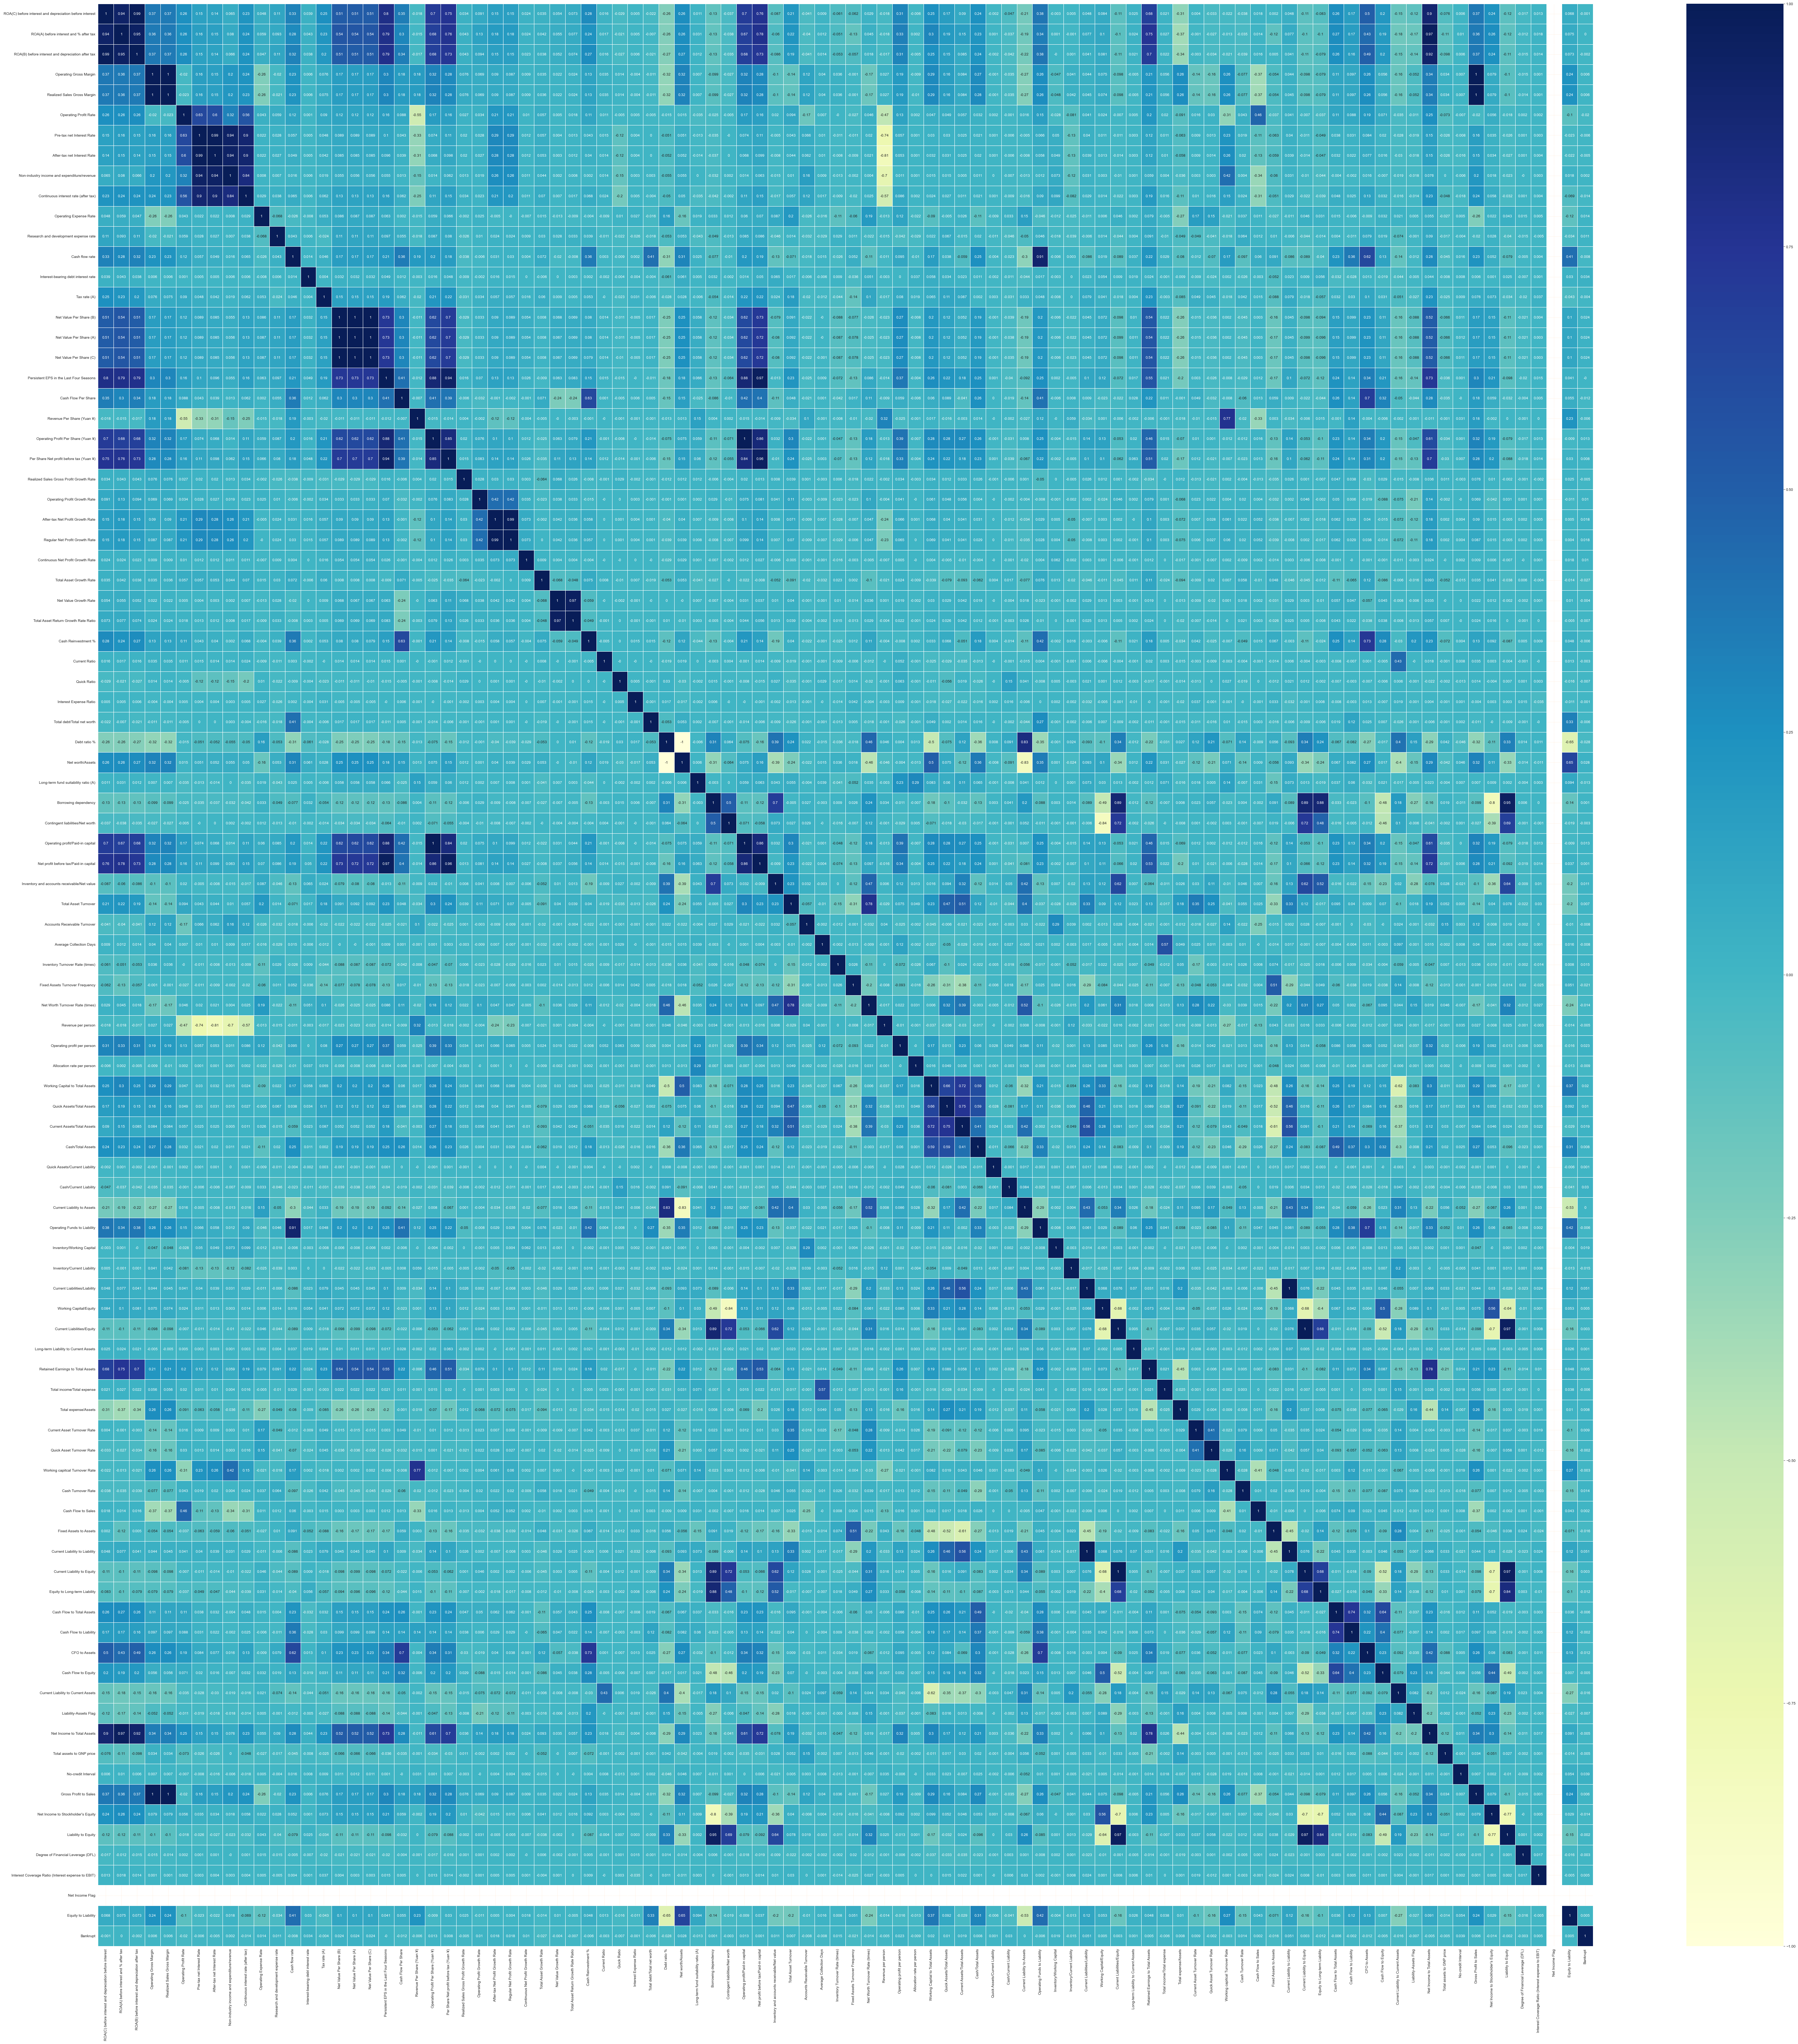

In [73]:
df_train = pd.DataFrame(std_X_train, columns= df_c.iloc[:, 1:96].columns)
df_train["Bankrupt"] = y_train

corr = df_train.corr()
plt.figure(figsize = (90,96))

sns.heatmap(round(corr, 3), annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()

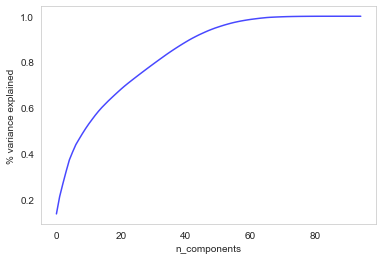

In [82]:

std_X_test = std.transform(X_test)

pca = PCA(n_components = std_X_test.shape[1])
pca_data = pca.fit_transform(std_X_train)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("% variance explained")
plt.show()

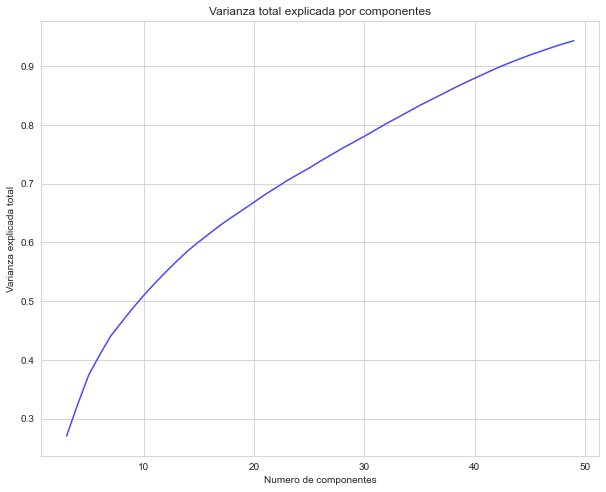

In [84]:
# pca = PCA(n_components = std_X_test.shape[1])
# pca_data = pca.fit_transform(std_X_train)

# percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
# cumm_var_explained = np.cumsum(percent_var_explained)

# plt.plot(cumm_var_explained)
# plt.grid()
# plt.xlabel("n_components")
# plt.ylabel("% variance explained")
# plt.show()

# Estandarizar los datos de test
std_X_test = std.transform(X_test)

# Lista para almacenar los resultados de la validación
TEV = [] 
# Numero de componentes a probar
n_components = np.arange(3,50) 
''' Para cada numero de componentes se instancia el modelo
    y se realiza la validación de los datos de prueba
    para obtener el total de la varianza explicada'''
for n in n_components: 
    pca = PCA(n_components = n)
    # Entrenamos el modelo
    pca.fit_transform(std_X_train) 
    # Calculamos la varianza total
    total_varianza = pca.explained_variance_ratio_.sum() 
    # Agregamos la varianza total al listado
    TEV.append(total_varianza) 

'''
Creamos una figura para mostrar el Trazado de la varianza total explicada del número de componentes
'''
sns.set_style('whitegrid')
sns.set_palette('bwr')
plt.figure(figsize = (10,8))
plt.plot(n_components, TEV)
plt.xlabel('Numero de componentes')
plt.ylabel('Varianza explicada total')
plt.title('Varianza total explicada por componentes')
plt.show()

In [85]:
#pca = PCA(n_components = 5, random_state = 10)
t_X_train = pca.fit_transform(std_X_train)
t_X_train.shape

(4773, 49)

In [86]:
cumm_var_explained

array([0.13848031, 0.21411804, 0.27043926, 0.32382504, 0.37391718,
       0.40846558, 0.44052211, 0.46444589, 0.48790119, 0.51012645,
       0.53081073, 0.54985692, 0.56864371, 0.58598003, 0.60190411,
       0.61631732, 0.63059205, 0.64397057, 0.65717743, 0.67014034,
       0.68289249, 0.69507896, 0.70663145, 0.71775763, 0.72874764,
       0.73965169, 0.75043371, 0.76112103, 0.77176995, 0.78228747,
       0.79268057, 0.80302944, 0.81321361, 0.82337746, 0.83348103,
       0.84317492, 0.85265379, 0.86188549, 0.87091212, 0.87965561,
       0.88819781, 0.89650147, 0.90429522, 0.91160656, 0.9186837 ,
       0.92517681, 0.93156959, 0.93768848, 0.94319953, 0.94853018,
       0.95325756, 0.95782875, 0.96221779, 0.96619081, 0.96999721,
       0.97339856, 0.97642652, 0.97924737, 0.9817389 , 0.98406909,
       0.98618963, 0.98803536, 0.98982002, 0.99152289, 0.99295283,
       0.99436362, 0.99532971, 0.99605636, 0.99669492, 0.99726025,
       0.99779886, 0.99824308, 0.9985904 , 0.99891135, 0.99914

In [87]:
pca.explained_variance_

array([13.01987663,  7.11143711,  5.29530377,  5.01931524,  4.70964778,
        3.2482297 ,  3.0139456 ,  2.24930645,  2.20526006,  2.08961283,
        1.94472926,  1.79071696,  1.76632866,  1.62995592,  1.49717648,
        1.35512535,  1.34210598,  1.25784395,  1.24170566,  1.21876825,
        1.19895354,  1.1457683 ,  1.08616121,  1.04607873,  1.03327758,
        1.02519444,  1.01372234,  1.004818  ,  1.00120707,  0.98885368,
        0.97715548,  0.97299672,  0.95751198,  0.95559926,  0.94993352,
        0.91140741,  0.89118879,  0.8679389 ,  0.84867842,  0.82205561,
        0.80312499,  0.78070514,  0.73276515,  0.68739349,  0.66536006,
        0.61047438,  0.60104387,  0.57498711,  0.51809813])

In [88]:
sum(pca.explained_variance_ratio_)

0.9431943156604103

### Correlacion despues de PCA:

In [97]:
pca = PCA(n_components=3, random_state = 10)
pca_train_data = pca.fit_transform(std_X_train)
pca_test_data = pca.transform(std_X_test)

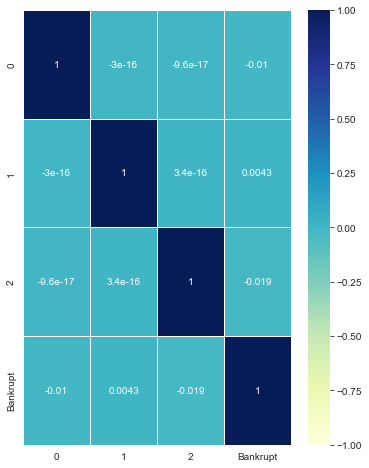

In [98]:
df_train_pca = pd.DataFrame(pca_train_data)
df_train_pca["Bankrupt"] = y_train

corr = df_train_pca.corr()
plt.figure(figsize = (6,8))

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()

In [100]:
total_val = pca.explained_variance_ratio_.sum()
print('La varianza total explicada por estos componentes es %.2f' %total_val)

La varianza total explicada por estos componentes es 0.27


# Limpieza del dataset

In [101]:
df_drop = df_c
df_drop.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [107]:
i = 0
for i in range(len(df_drop.columns)):
    '''
        Se creo un ciclo for para reemplazar los espacios de todas las columnas por (_).
        Ademas, se esta calculando la media de cada campo.
    ''' 
    nombres_anteriores = df_drop.columns[i]
    nombres_actuales = df_drop.columns[i].strip().replace(" ", "_")

    df_drop.rename(columns={nombres_anteriores: nombres_actuales }, inplace = True)

    print(df_drop.columns[i], ":", "Mean:", df_drop[df_drop.columns[i]].mean())

Bankrupt : Mean: 0.03226279513125092
ROA(C)_before_interest_and_depreciation_before_interest : Mean: 0.505179633241782
ROA(A)_before_interest_and_%_after_tax : Mean: 0.5586249158750473
ROA(B)_before_interest_and_depreciation_after_tax : Mean: 0.5535887093516647
Operating_Gross_Margin : Mean: 0.6079480383703836
Realized_Sales_Gross_Margin : Mean: 0.6079294691769787
Operating_Profit_Rate : Mean: 0.9987551277900453
Pre-tax_net_Interest_Rate : Mean: 0.7971897524712888
After-tax_net_Interest_Rate : Mean: 0.8090835935135369
Non-industry_income_and_expenditure/revenue : Mean: 0.30362292364973476
Continuous_interest_rate_(after_tax) : Mean: 0.7813814325261427
Operating_Expense_Rate : Mean: 1995347312.8027918
Research_and_development_expense_rate : Mean: 1950427306.056799
Cash_flow_rate : Mean: 0.46743118577966175
Interest-bearing_debt_interest_rate : Mean: 16448012.905942492
Tax_rate_(A) : Mean: 0.11500074794142456
Net_Value_Per_Share_(B) : Mean: 0.19066057949747367
Net_Value_Per_Share_(A) : M

In [108]:
# Se observa los nulos en los campos
df_drop.isnull().sum()

Bankrupt                                                   0
ROA(C)_before_interest_and_depreciation_before_interest    0
ROA(A)_before_interest_and_%_after_tax                     0
ROA(B)_before_interest_and_depreciation_after_tax          0
Operating_Gross_Margin                                     0
                                                          ..
Liability_to_Equity                                        0
Degree_of_Financial_Leverage_(DFL)                         0
Interest_Coverage_Ratio_(Interest_expense_to_EBIT)         0
Net_Income_Flag                                            0
Equity_to_Liability                                        0
Length: 96, dtype: int64

In [109]:
# Se observa datos vacios
df_drop.isna().sum()  

Bankrupt                                                   0
ROA(C)_before_interest_and_depreciation_before_interest    0
ROA(A)_before_interest_and_%_after_tax                     0
ROA(B)_before_interest_and_depreciation_after_tax          0
Operating_Gross_Margin                                     0
                                                          ..
Liability_to_Equity                                        0
Degree_of_Financial_Leverage_(DFL)                         0
Interest_Coverage_Ratio_(Interest_expense_to_EBIT)         0
Net_Income_Flag                                            0
Equity_to_Liability                                        0
Length: 96, dtype: int64

In [112]:
X = df_drop.drop(['Bankrupt'], axis = 1)
y = df_drop['Bankrupt']

In [113]:
# Se separa el dataframe en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [125]:
clf_rf = RandomForestClassifier(criterion='entropy', random_state=0)
parametrs = {'n_estimators': range(10, 30, 10),
             'max_depth': range(1, 12, 2),
             'min_samples_leaf': range(1, 7),
             'min_samples_split': range(2, 11, 2)}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 20}

In [118]:
mejor_clf = grid_search_cv_clf.best_estimator_

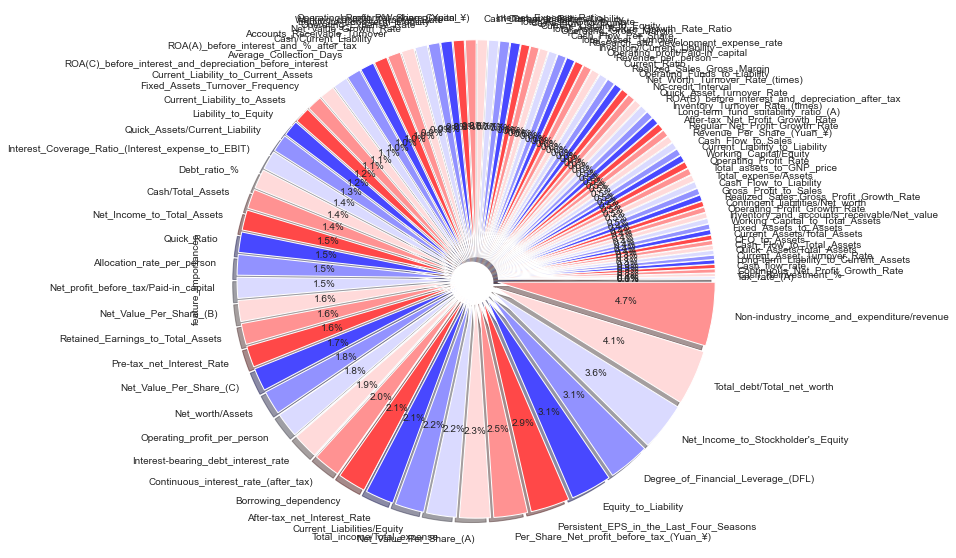

In [124]:

df_caracteristicas_importantes = pd.DataFrame({'features':list(X_train.columns), 
                                       'feature_importances':  mejor_clf.feature_importances_})\
                        .sort_values(by='feature_importances')

df_caracteristicas_importantes.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = df_caracteristicas_importantes.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(10, 10));

In [127]:
df_caracteristicas_importantes.tail()

,features,feature_importances
94,Equity_to_Liability,0.030522
91,Degree_of_Financial_Leverage_(DFL),0.030710
89,Net_Income_to_Stockholder's_Equity,0.035768
35,Total_debt/Total_net_worth,0.041014
8,Non-industry_income_and_expenditure/revenue,0.047356
